# Exploratory Data Analysis

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

# Load Data

In [2]:
PATH = './dataset/'

train_data = pd.read_csv(os.path.join(PATH, 'train_data.csv'), encoding='utf-8')
test_data = pd.read_csv(os.path.join(PATH, 'test_data.csv'), encoding='utf-8')
topic_dict = pd.read_csv(os.path.join(PATH, 'topic_dict.csv'), encoding='utf-8')

In [58]:
train_data = train_data.drop(['index'], axis=1)

In [59]:
# 데이터 label 별 균형 확인
print('TRAIN LABEL: ', train_data['topic_idx'].value_counts(), sep='\n', end='\n\n')

"""
TRAIN LABEL: 
4    7629
2    7362
5    6933
6    6751
1    6222
3    5933
0    4824
"""

TRAIN LABEL: 
4    7629
2    7362
5    6933
6    6751
1    6222
3    5933
0    4824
Name: topic_idx, dtype: int64



'\nTRAIN LABEL: \n4    7629\n2    7362\n5    6933\n6    6751\n1    6222\n3    5933\n0    4824\n'

In [60]:
# 결측지 확인
print(train_data.info(), end='\n\n')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45654 entries, 0 to 45653
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      45654 non-null  object
 1   topic_idx  45654 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 713.5+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   9131 non-null   int64 
 1   title   9131 non-null   object
dtypes: int64(1), object(1)
memory usage: 142.8+ KB
None


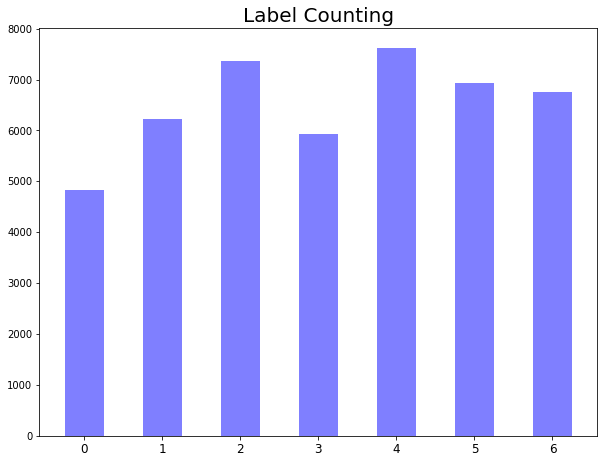

In [61]:
# label 분포
feature = train_data['topic_idx']
temp = feature.value_counts()

plt.figure(figsize = (10, 7.5))
plt.title('Label Counting', fontsize=20)

plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
# plt.text(4.85, temp.values[0]+20, s=temp.values[0]) # 5
# plt.text(1.85, temp.values[1]+20, s=temp.values[1]) # 2
# plt.text(0.85, temp.values[2]+20, s=temp.values[2]) # 1
# plt.text(3.85, temp.values[3]+20, s=temp.values[3]) # 4

plt.xticks(temp.keys(), fontsize=12)    # x축값
plt.show()

# 불용어 처리

In [65]:
for i in range(100):
    print(train_data['title'][i])

인천→핀란드 항공기 결항…휴가철 여행객 분통
실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화
이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
시진핑 트럼프에 중미 무역협상 조속 타결 희망
팔레스타인 가자지구서 16세 소년 이스라엘군 총격에 사망
인도 48년 만에 파키스탄 공습…테러 캠프 폭격종합2보
美대선 TV토론 음담패설 만회실패 트럼프…사과 대신 빌클린턴 공격해 역효과
푸틴 한반도 상황 진전 위한 방안 김정은 위원장과 논의
특검 면죄부 받은 트럼프 스캔들 보도 언론 맹공…국민의 적
日 오키나와서 열린 강제징용 노동자 추도식
이란서 최고지도자 모욕 혐의 미국인에 징역 10년 선고
카니발 축제 보러 가자…브라질 리우에 대형 유람선 행렬
美올랜도 병원 최악 총기 테러 부상자 치료비 안 받는다
日 대기업 올해 평균 2.46% 임금 인상
WMO 엘니뇨 여전히 강력…2분기엔 소멸될 듯
이스라엘 네타냐후 유대교도 병역문제로 연정 협상 진통
UAE 사우디 이어 美 호르무즈 호위 연합에 참여키로
사우디군 오만해 유조선 공격 예멘반군과 연결…이란 겨냥
개천에서 용 나와라 美사업가 모교에 1천억원 장학금 기부
EU 브렉시트 합의 전 해야 할 일 많아…英에 경고
스팍스운용 일본 디플레 벗어나…새로운 도약 준비 중
트럼프 총기난사는 惡의 공격…총기규제 초당적 협력 촉구종합
NBA 카지노업체와 스폰서 계약…美프로스포츠 사상 처음
오바마 대통령 퇴임 후 워싱턴DC에 사무실 개소 예정
美 전문가 트럼프 정부 북한과 정상급 관계 시도할 것
이스라엘 네타냐후 이란에 경고…우리 전투기 도달가능 지역
이스라엘 네타냐후 총선 한달 앞두고 우크라 방문 예정
트럼프 탄핵보고서 통화기록에 등장한 의문의 숫자 1
미국 산업생산 한달만에 0.1%↑…제조업 회복 기대
셰이크 살만 AFC 회장 평양 방문…최휘 국가체육지도위원장...
신중국70년 ①차이나 미라클…최빈국서 G2 경제대국 부상
UAE 단교 20개월만에 카타르 왕래 화물선 

1. 日, 美, 韓 등 한자를 한글로 변환한다.
    - hanja

-> 그 자체로 학습먼저 해본다.

In [1]:
# !pip install hanja